In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the Excel file and the relevant sheets

file_path = 'path_to_your_file/Assessment Data1.xlsx' 

In [3]:
# Ensure the data is loaded

q2_2017 = pd.read_excel('Assessment Data1.xlsx', sheet_name='Q2.2017')
q2_2018 = pd.read_excel('Assessment Data1.xlsx', sheet_name='Q2.2018')


In [4]:
# Aggregate total shipping costs for each year

total_cost_2017 = q2_2017['Net Amount'].sum()
total_cost_2018 = q2_2018['Net Amount'].sum()

In [5]:
# Print the results to showcase in VS Code

print("Total Shipping Costs:")
print(f"2017: ${total_cost_2017:.2f}")
print(f"2018: ${total_cost_2018:.2f}\n")

Total Shipping Costs:
2017: $146145.69
2018: $238678.37



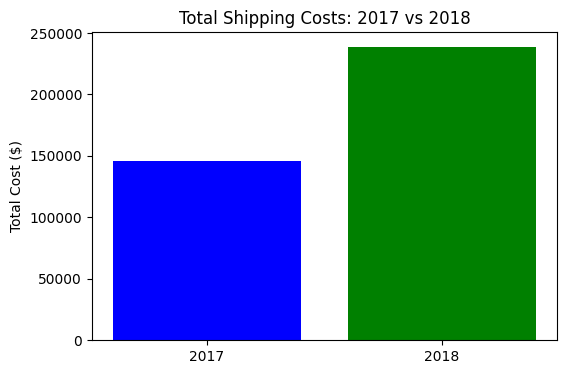

In [6]:
# Total Shipping Costs for 2017 vs 2018

plt.figure(figsize=(6, 4))
plt.bar(['2017', '2018'], [total_cost_2017, total_cost_2018], color=['blue', 'green'])
plt.title('Total Shipping Costs: 2017 vs 2018')
plt.ylabel('Total Cost ($)')
plt.show()

In [7]:
# Calculate average billed weight for each year

average_weight_2017 = q2_2017['Billed Weight'].mean()
average_weight_2018 = q2_2018['Billed Weight'].mean()

In [8]:
print("Average Billed Weight:")
print(f"2017: {average_weight_2017:.2f} lbs")
print(f"2018: {average_weight_2018:.2f} lbs\n")

Average Billed Weight:
2017: 4.25 lbs
2018: 4.02 lbs



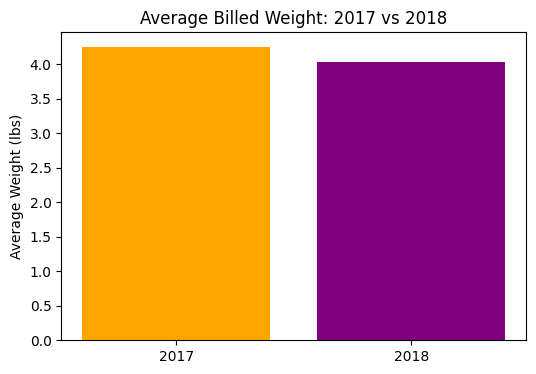

In [9]:
# Average Billed Weight Comparison

plt.figure(figsize=(6, 4))
plt.bar(['2017', '2018'], [average_weight_2017, average_weight_2018], color=['orange', 'purple'])
plt.title('Average Billed Weight: 2017 vs 2018')
plt.ylabel('Average Weight (lbs)')
plt.show()

In [10]:
# Analyze zone distribution (as a percentage of total shipments)

zone_distribution_2017 = q2_2017['Zone'].value_counts(normalize=True)
zone_distribution_2018 = q2_2018['Zone'].value_counts(normalize=True)

In [11]:
print("Zone Distribution in 2017 (as % of total shipments):")
print(zone_distribution_2017 * 100)  # Convert to percentage
print("\nZone Distribution in 2018 (as % of total shipments):")
print(zone_distribution_2018 * 100)

Zone Distribution in 2017 (as % of total shipments):
Zone
2.0      25.058349
4.0      19.427193
3.0      17.480913
5.0      13.683294
8.0      10.111159
6.0       6.499466
7.0       4.094308
102.0     0.464813
206.0     0.383718
208.0     0.361961
134.0     0.304601
104.0     0.286799
205.0     0.251197
103.0     0.235373
105.0     0.136477
207.0     0.110764
108.0     0.108786
308.0     0.106808
106.0     0.104830
0.0       0.098896
44.0      0.090985
138.0     0.075161
226.0     0.071205
135.0     0.069227
136.0     0.055382
133.0     0.051426
107.0     0.039559
46.0      0.037581
126.0     0.033625
204.0     0.031647
307.0     0.031647
224.0     0.027691
132.0     0.019779
137.0     0.015823
306.0     0.015823
305.0     0.007912
203.0     0.005934
124.0     0.005934
304.0     0.003956
Name: proportion, dtype: float64

Zone Distribution in 2018 (as % of total shipments):
Zone
2.0      27.230506
4.0      21.228459
3.0      18.202720
5.0      13.499718
8.0       7.890834
6.0       5.85

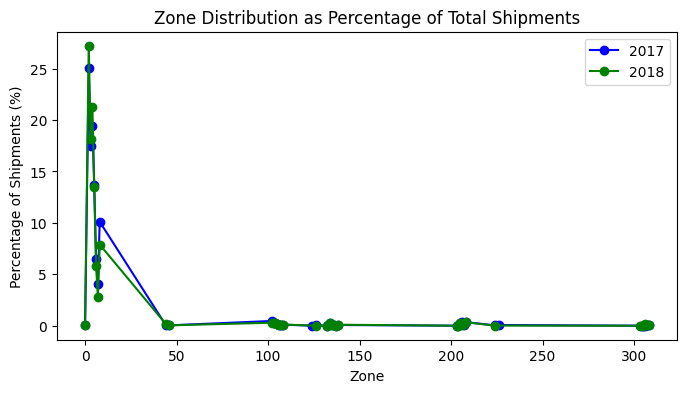

In [12]:
# Zone Distribution Comparison (Percentage)

zone_distribution_2017_sorted = zone_distribution_2017.sort_index()
zone_distribution_2018_sorted = zone_distribution_2018.sort_index()
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(zone_distribution_2017_sorted.index, zone_distribution_2017_sorted * 100, marker='o', label='2017', color='blue')
ax.plot(zone_distribution_2018_sorted.index, zone_distribution_2018_sorted * 100, marker='o', label='2018', color='green')
ax.set_title('Zone Distribution as Percentage of Total Shipments')
ax.set_xlabel('Zone')
ax.set_ylabel('Percentage of Shipments (%)')
ax.legend()
plt.show()

In [13]:
# Analyze cost drivers by Charge Description

charges_by_description_2017 = q2_2017.groupby('Charge Description')['Net Amount'].sum()
charges_by_description_2018 = q2_2018.groupby('Charge Description')['Net Amount'].sum()

In [14]:
print("\nCost by Charge Description in 2017:")
print(charges_by_description_2017)

print("\nCost by Charge Description in 2018:")
print(charges_by_description_2018)


Cost by Charge Description in 2017:
Charge Description
2nd Day Air Commercial                     2117.54
2nd Day Air Residential                    1431.02
3 Day Select Commercial                     374.20
3 Day Select Residential                    130.59
3 Day Select Undeliverable Return             7.65
                                            ...   
Void Delivery Area Surcharge - Extended      -5.04
Void Fuel Surcharge                          -2.06
Void Ground Commercial                      -13.37
Void Ground Residential                     -19.57
Void Residential Surcharge                   -5.61
Name: Net Amount, Length: 64, dtype: float64

Cost by Charge Description in 2018:
Charge Description
2nd Day Air Commercial           1731.15
2nd Day Air Residential          2229.98
3 Day Select Commercial          1368.16
3 Day Select Residential          316.74
3 Day Select Return to Sender       7.94
                                  ...   
Void Delivery Area Surcharge       -

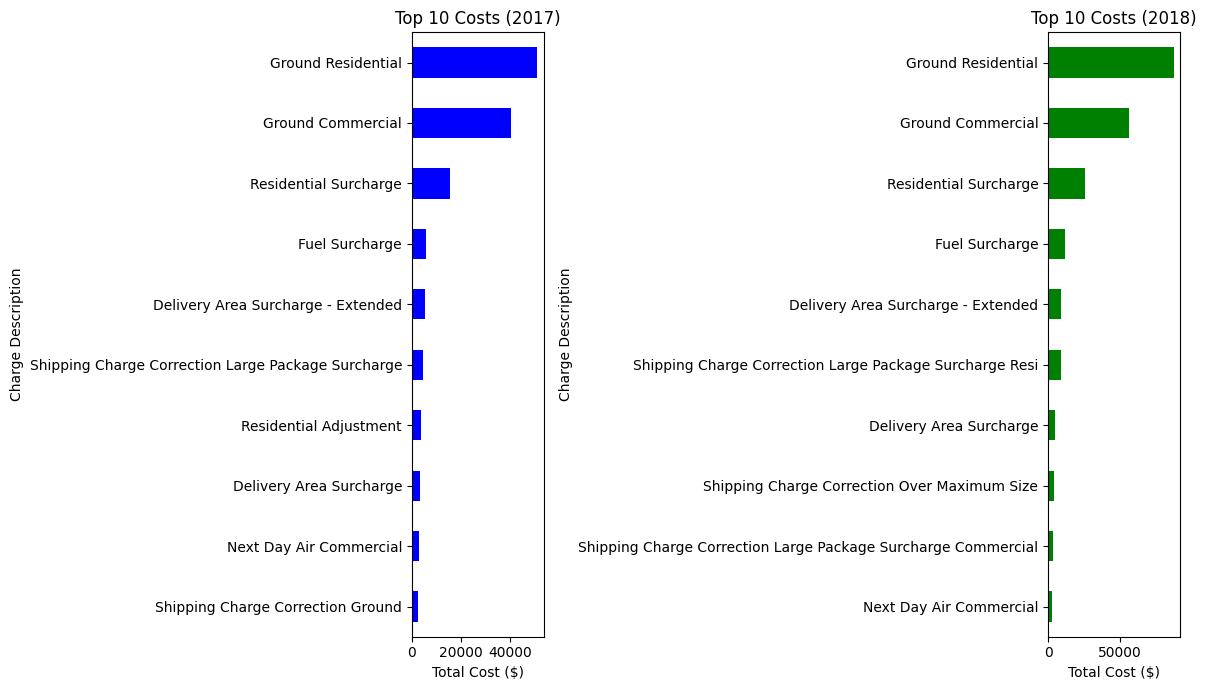

In [15]:
# Plot top 10 cost drivers for 2017 and 2018, sorted and plotted

fig, ax = plt.subplots(1, 2, figsize=(12, 7))

charges_by_description_2017.nlargest(10).sort_values().plot(kind='barh', ax=ax[0], color='blue', title='Top 10 Costs (2017)')
charges_by_description_2018.nlargest(10).sort_values().plot(kind='barh', ax=ax[1], color='green', title='Top 10 Costs (2018)')

ax[0].set_xlabel('Total Cost ($)')
ax[1].set_xlabel('Total Cost ($)')

plt.tight_layout()
plt.show()